In [120]:
import pandas as pd

df = pd.read_csv('desafio1.csv')
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [115]:
df_out = (df.groupby('estado_residencia')['pontuacao_credito']
 .agg([lambda x: x.value_counts().index[0],'median', 'mean', 'std']))
df_out.columns = ['moda', 'mediana', 'media', 'desvio_padrao']
df_out.sort_index(ascending=False,inplace=True)
df_out.to_json('semana3.json',orient='index')
df_out           

,moda,mediana,media,desvio-padrao
estado_residencia,,,,
SC,850,653,649.537653,97.233493
RS,850,650,651.105143,95.136598
PR,850,650,648.961294,98.607186


In [113]:
df.groupby(['estado_residencia']).agg(moda  = ('pontuacao_credito',
                                              lambda x: x.value_counts().index[0]),
                                      mediana = ('pontuacao_credito', 'median'),
                                      media = ('pontuacao_credito', 'mean'))
                                      #desvio-padrao = ('pontuacao_credito', 'std')
                                      #)

,moda,mediana,media
estado_residencia,,,
PR,850,650,648.961294
RS,850,650,651.105143
SC,850,653,649.537653


In [91]:
df.groupby(['estado_residencia'])['pontuacao_credito'].value_counts()

estado_residencia  pontuacao_credito
PR                 850                  47
                   714                  13
                   634                  12
                   651                  12
                   660                  12
                                        ..
SC                 808                   1
                   816                   1
                   838                   1
                   839                   1
                   845                   1
Name: pontuacao_credito, Length: 1222, dtype: int64

In [105]:
df['pontuacao_credito'][df['estado_residencia'] == 'PR'].mode()

0    850
dtype: int64

In [117]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [140]:
df.nunique()

RowNumber                   7000
id                          7000
sobrenome                   2448
pontuacao_credito            451
estado_residencia              3
genero                         2
idade                         69
nivel_estabilidade            11
saldo_conta                 4468
numero_produtos                4
possui_cartao_de_credito       2
membro_ativo                   2
dtype: int64

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [152]:
df_red = df.drop(columns=['RowNumber','id','sobrenome'])
for column in ['genero','possui_cartao_de_credito','estado_residencia','nivel_estabilidade','membro_ativo']:
    df_red[column] = df_red[column].astype('category')
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pontuacao_credito         7000 non-null   int64   
 1   estado_residencia         7000 non-null   category
 2   genero                    7000 non-null   category
 3   idade                     7000 non-null   int64   
 4   nivel_estabilidade        7000 non-null   category
 5   saldo_conta               7000 non-null   float64 
 6   numero_produtos           7000 non-null   int64   
 7   possui_cartao_de_credito  7000 non-null   category
 8   membro_ativo              7000 non-null   category
dtypes: category(5), float64(1), int64(3)
memory usage: 253.8 KB


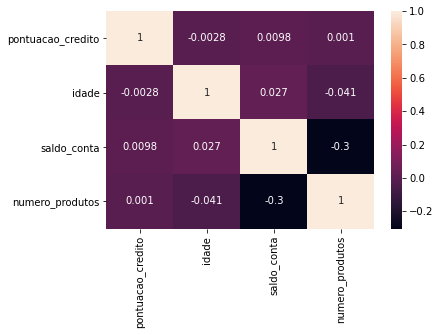

In [154]:
#plt.figure(figsize=(8,6))
sns.heatmap(df_red.corr(), annot=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pontuacao_credito         7000 non-null   int64  
 1   estado_residencia         7000 non-null   object 
 2   genero                    7000 non-null   object 
 3   idade                     7000 non-null   int64  
 4   nivel_estabilidade        7000 non-null   int64  
 5   saldo_conta               7000 non-null   float64
 6   numero_produtos           7000 non-null   int64  
 7   possui_cartao_de_credito  7000 non-null   int64  
 8   membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 492.3+ KB


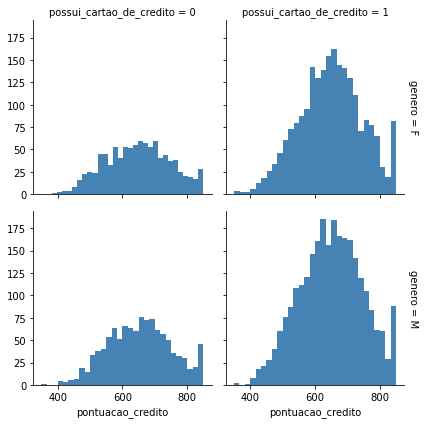

In [160]:
g = sns.FacetGrid(df, row="genero", col="possui_cartao_de_credito", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "pontuacao_credito", color="steelblue", bins=30);

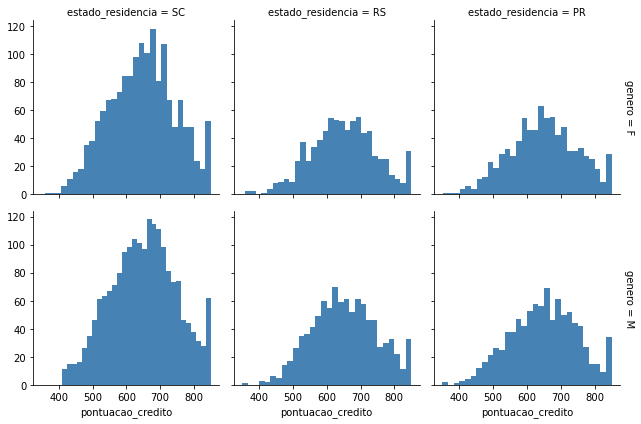

In [161]:
g = sns.FacetGrid(df, row="genero", col="estado_residencia", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "pontuacao_credito", color="steelblue", bins=30);

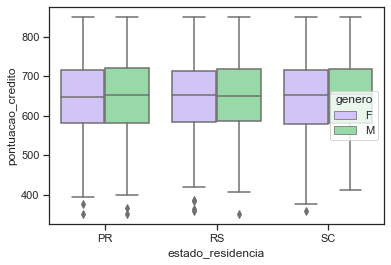

In [162]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="estado_residencia", y="pontuacao_credito",
            hue="genero", palette=["m", "g"],
            data=df_red);
#sns.despine(offset=10, trim=True)

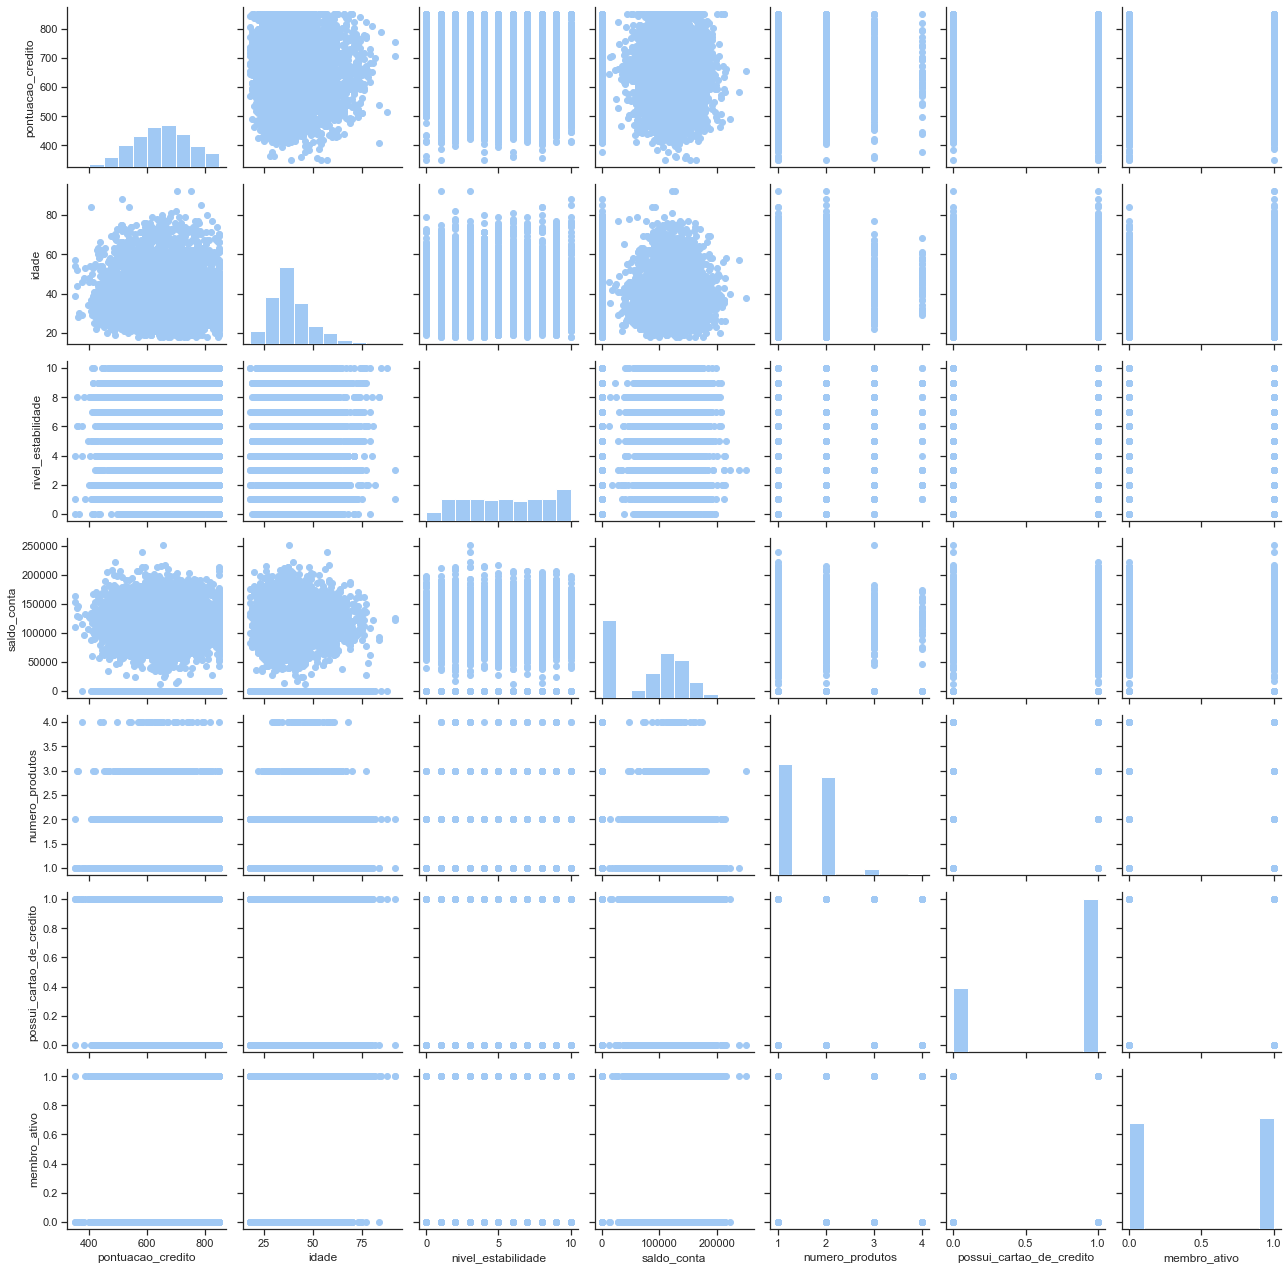

In [163]:
g = sns.PairGrid(df_red)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

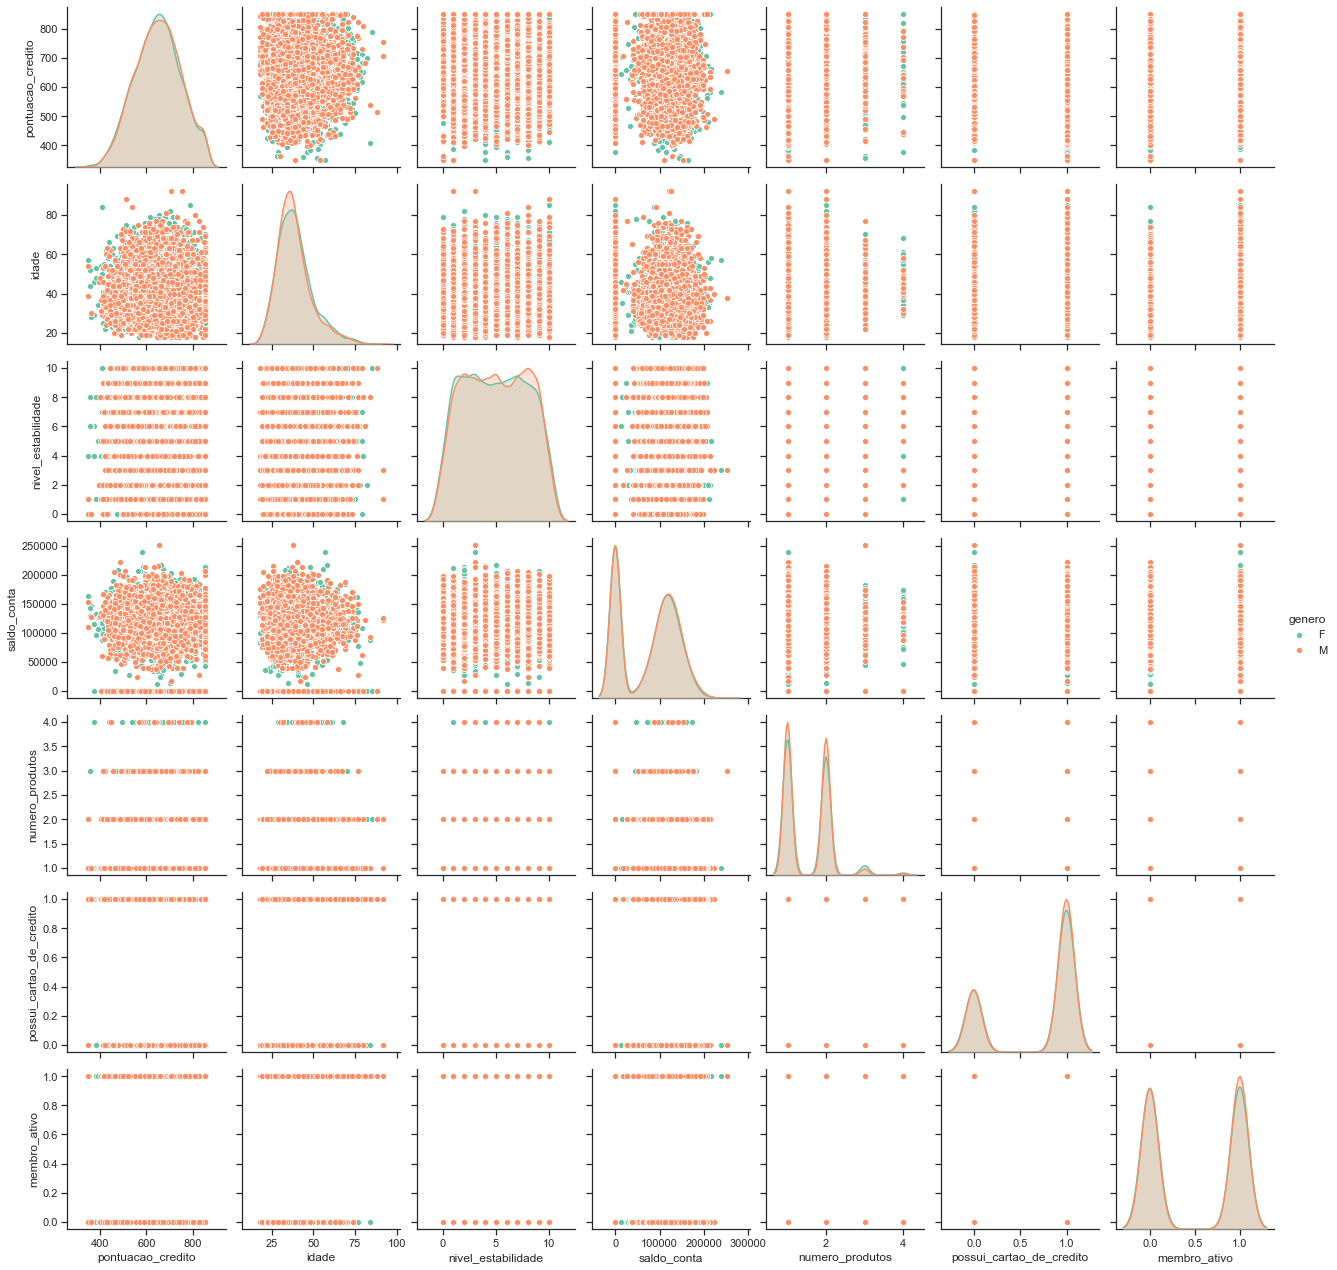

In [164]:
g = sns.pairplot(df_red, hue="genero", palette="Set2", diag_kind="kde", height=2.5)